In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
ts = pd.read_excel('../data/473.xlsx')

In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    # rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    # rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 


In [7]:
ts.head()

,performance_date,price
0,2013-12-13,100.00
1,2013-12-16,99.97
2,2013-12-17,99.96
3,2013-12-18,99.62
4,2013-12-19,99.99


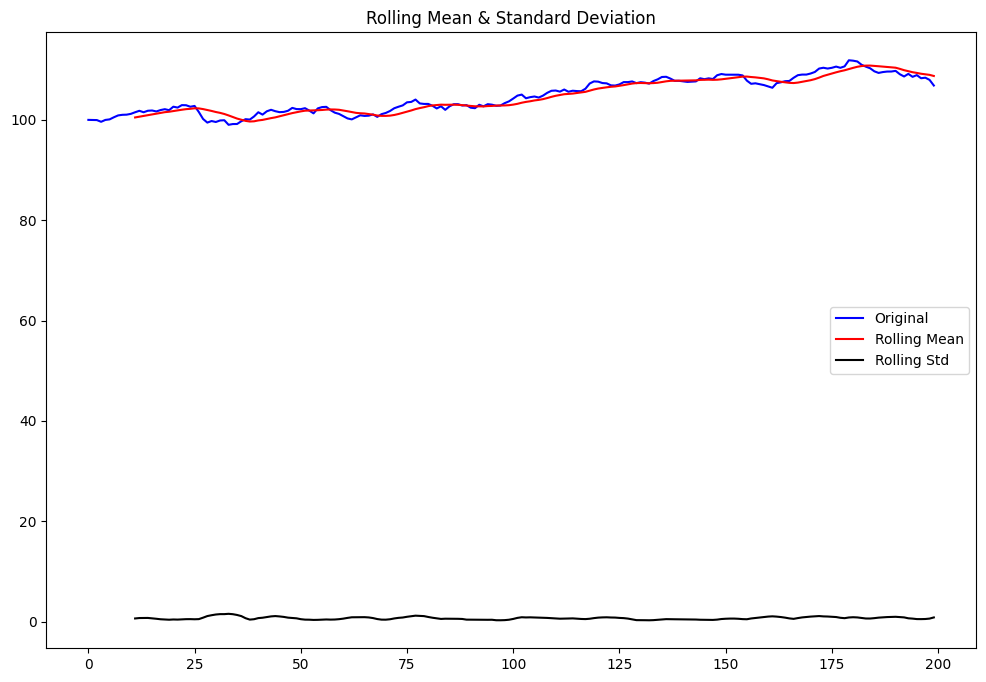

Results of Dickey-Fuller Test:
Test Statistic                  -1.426630
p-value                          0.569445
#Lags Used                       1.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64


In [11]:
test_stationarity(ts.price[0:200])

The Dickey-Fuller test confirms what could have been seen already by simply plotting the time series: the TS is non-stationary. Essentially if the `Test Statistic` is greater than the `Critical Value` than the time series is stationary.

We then have to transform the data to make it more stationary. There are various transformations you can do to stationarize the data.

- Deflation by CPI
- Logarithmic
- First Difference
- Seasonal Difference
- Seasonal Adjustment

# Differencing Operators

Differencing Operators are among the most common operators and also the one that we investigate in the present work


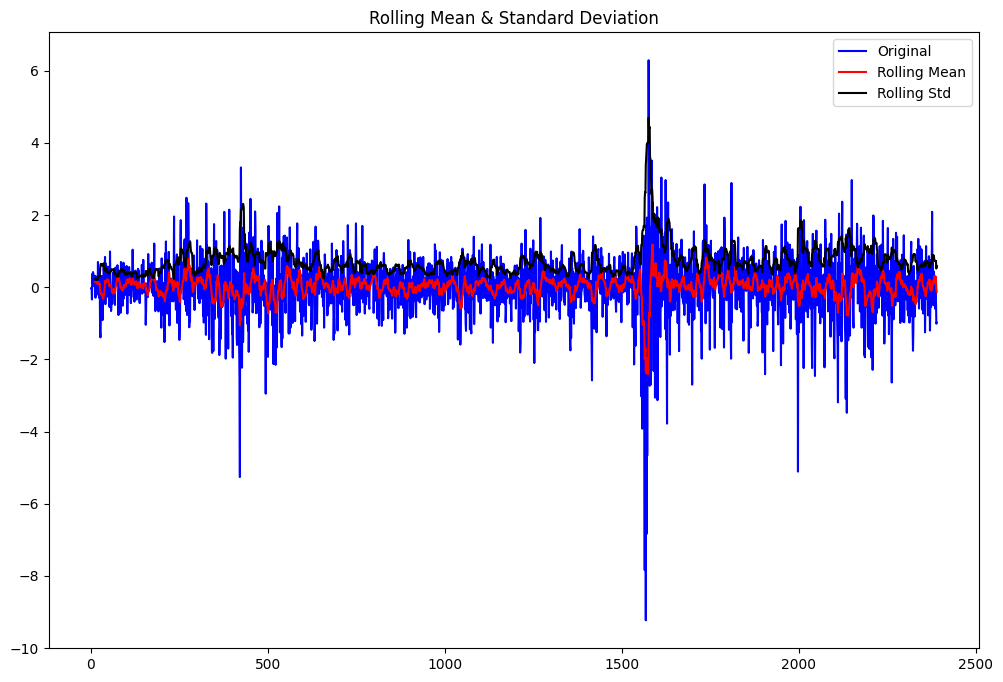

Results of Dickey-Fuller Test:
Test Statistic                -1.347998e+01
p-value                        3.255577e-25
#Lags Used                     1.200000e+01
Number of Observations Used    2.377000e+03
Critical Value (1%)           -3.433104e+00
Critical Value (5%)           -2.862757e+00
Critical Value (10%)          -2.567418e+00
dtype: float64


In [13]:
ts['first_difference'] = ts.price - ts.price.shift(1)
test_stationarity(ts.first_difference.dropna(inplace=False))

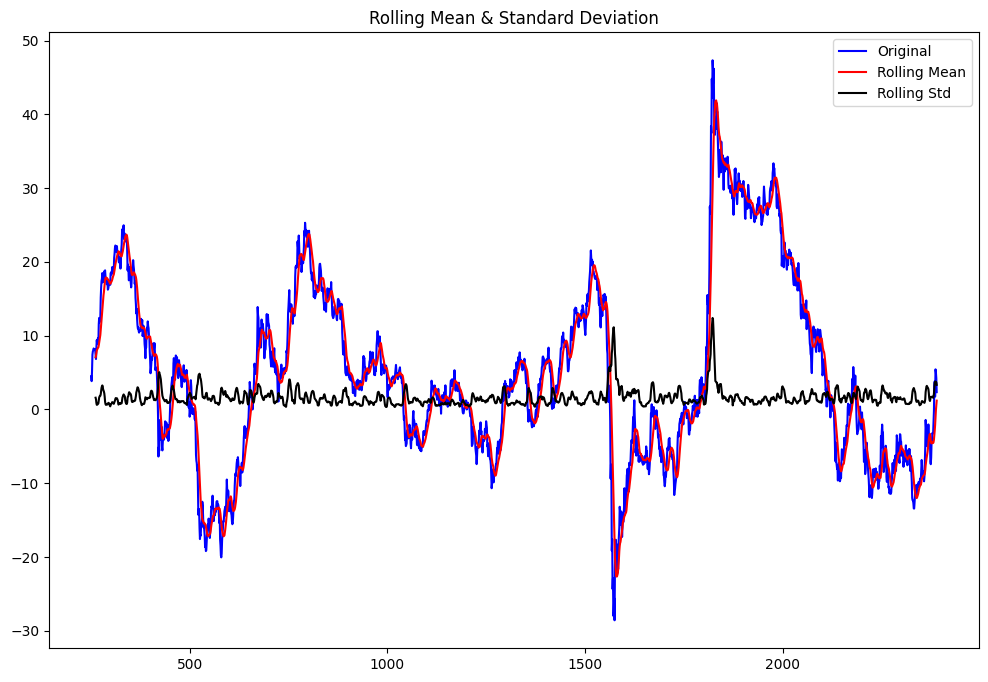

Results of Dickey-Fuller Test:
Test Statistic                   -3.073809
p-value                           0.028553
#Lags Used                       14.000000
Number of Observations Used    2125.000000
Critical Value (1%)              -3.433431
Critical Value (5%)              -2.862901
Critical Value (10%)             -2.567495
dtype: float64


In [27]:
ts['seasonal_difference'] = ts.price - ts.price.shift(251)
test_stationarity(ts.seasonal_difference.dropna(inplace=False))

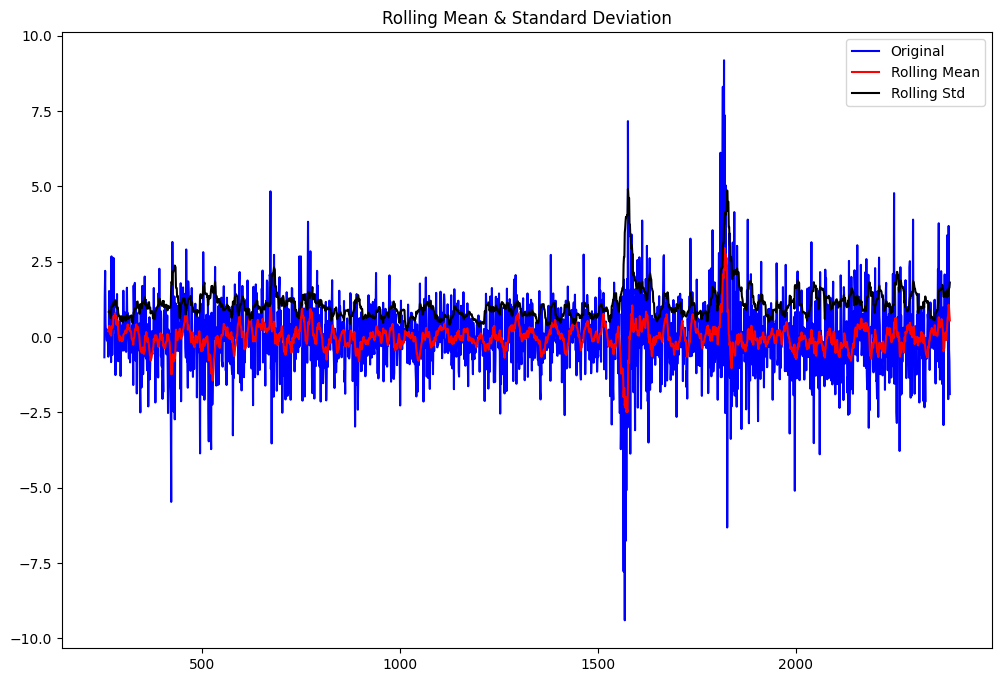

Results of Dickey-Fuller Test:
Test Statistic                -1.121683e+01
p-value                        2.059622e-20
#Lags Used                     1.300000e+01
Number of Observations Used    2.125000e+03
Critical Value (1%)           -3.433431e+00
Critical Value (5%)           -2.862901e+00
Critical Value (10%)          -2.567495e+00
dtype: float64


In [28]:
ts['seasonal_first_difference'] = ts.first_difference - ts.first_difference.shift(251)
test_stationarity(ts.seasonal_first_difference.dropna(inplace=False))

# Plot the ACF and PACF charts and find the optimal parameters

The next step is to determine the tuning parameters of the model by looking at the autocorrelation and partial autocorrelation graphs. There are many rules and best practices about how to select the appropriate AR, MA, SAR, and MAR terms for the model. 

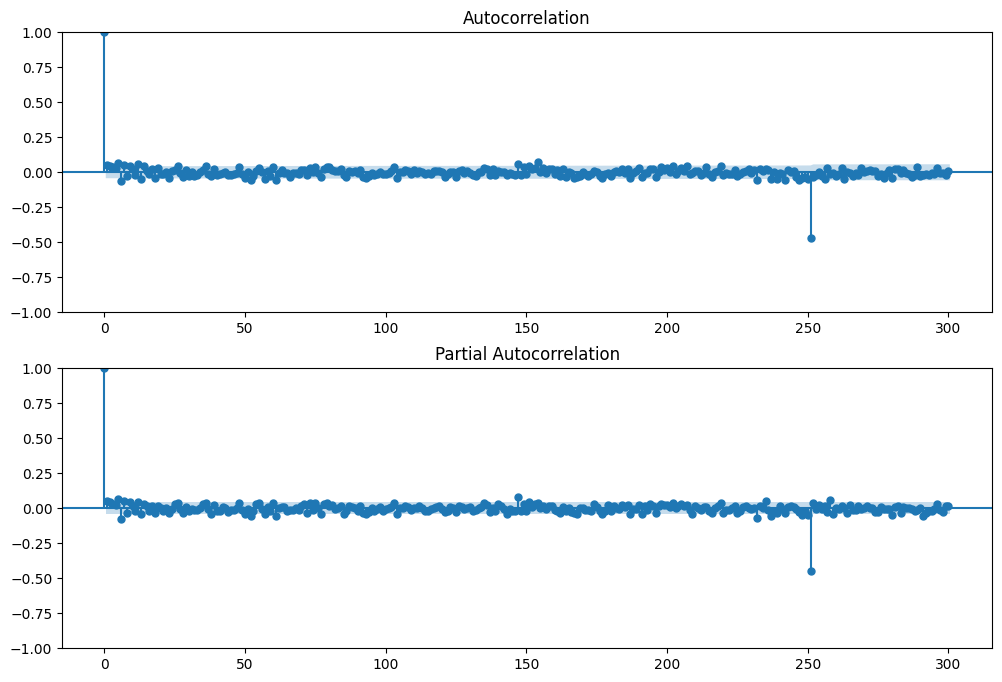

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts.seasonal_first_difference.iloc[252:], lags=300, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts.seasonal_first_difference.iloc[252:], lags=300, ax=ax2)